In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Define the Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(784, activation="tanh"),
        layers.Reshape((28, 28))
    ])
    return model

In [ ]:
# Step 2: Define the Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Compile the Discriminator
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Build and Compile the GAN
generator = build_generator()
discriminator.trainable = False  # Freeze the discriminator weights in the GAN

gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=128):
    # Load and preprocess MNIST dataset
    (x_train, _), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the Discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))

        # Extract loss and accuracy values
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

        # Train the Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))[0]  # Access the loss value

        # Log Progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch} [D loss: {d_loss:.4f}, acc.: {d_acc * 100:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(generator, epoch)


In [ ]:
# Step 4: Visualizing Generated Images
def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off")
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.9004, acc.: 27.34%] [G loss: 0.7880]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


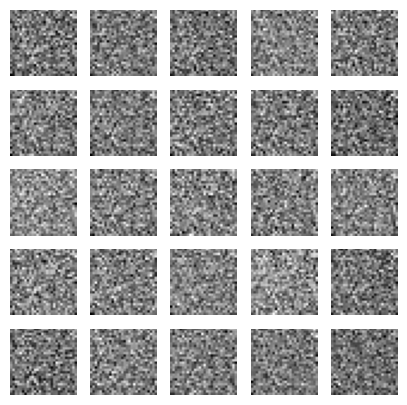

Epoch 1000 [D loss: 3.7779, acc.: 4.50%] [G loss: 3.7789]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


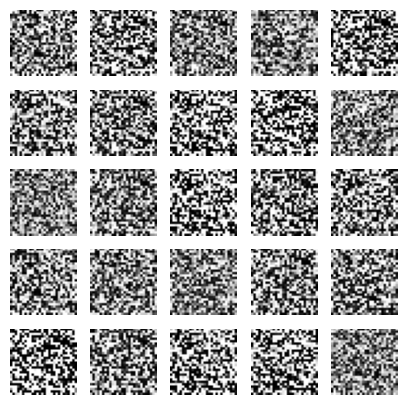

In [ ]:
# Step 5: Train the GAN
train_gan(generator, discriminator, gan, epochs=10000, batch_size=64)


In [ ]:
# prompt: write a code for gan

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Define the Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(784, activation="tanh"),
        layers.Reshape((28, 28))
    ])
    return model
# Step 2: Define the Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Compile the Discriminator
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Build and Compile the GAN
generator = build_generator()
discriminator.trainable = False  # Freeze the discriminator weights in the GAN

gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=128):
    # Load and preprocess MNIST dataset
    (x_train, _), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the Discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))

        # Extract loss and accuracy values
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

        # Train the Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))[0]  # Access the loss value

        # Log Progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch} [D loss: {d_loss:.4f}, acc.: {d_acc * 100:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(generator, epoch)

# Step 4: Visualizing Generated Images
def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off")
    plt.show()
# Step 5: Train the GAN
train_gan(generator, discriminator, gan, epochs=10000, batch_size=64)